# Importing Libraries

In [1]:
from rdkit import RDLogger
from IPython.display import HTML
from molgx import *
import pickle
from joblib import parallel_backend
import os
import joblib

In [2]:
os.environ["OMP_NUM_THREADS"] = "12"

## Setup Logging

In [3]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
# Supress RDKit logger message
RDLogger.DisableLog('rdApp.*')
# Suppress warnings of Python library
import warnings
warnings.filterwarnings('ignore')

# Data Preparation

In [3]:
raw_df = pd.read_csv('https://raw.githubusercontent.com/OpenDrugAI/AttentiveFP/refs/heads/master/data/qm9.csv')
raw_df.head()

,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,...,zpve,u0,u298,h298,g298,cv,u0_atom,u298_atom,h298_atom,g298_atom
0,gdb_1,C,157.71180,157.709970,157.706990,0.0000,13.21,-0.3877,0.1171,0.5048,...,0.044749,-40.478930,-40.476062,-40.475117,-40.498597,6.469,-395.999595,-398.643290,-401.014647,-372.471772
1,gdb_2,N,293.60975,293.541110,191.393970,1.6256,9.46,-0.2570,0.0829,0.3399,...,0.034358,-56.525887,-56.523026,-56.522082,-56.544961,6.316,-276.861363,-278.620271,-280.399259,-259.338802
2,gdb_3,O,799.58812,437.903860,282.945450,1.8511,6.31,-0.2928,0.0687,0.3615,...,0.021375,-76.404702,-76.401867,-76.400922,-76.422349,6.002,-213.087624,-213.974294,-215.159658,-201.407171
3,gdb_4,C#C,0.00000,35.610036,35.610036,0.0000,16.28,-0.2845,0.0506,0.3351,...,0.026841,-77.308427,-77.305527,-77.304583,-77.327429,8.574,-385.501997,-387.237686,-389.016047,-365.800724
4,gdb_5,C#N,0.00000,44.593883,44.593883,2.8937,12.99,-0.3604,0.0191,0.3796,...,0.016601,-93.411888,-93.409370,-93.408425,-93.431246,6.278,-301.820534,-302.906752,-304.091489,-288.720028


In [4]:
raw_df["SMILES"] = raw_df["smiles"]
raw_df = raw_df.drop("smiles", axis=1)
raw_df.head()

,mol_id,A,B,C,mu,alpha,homo,lumo,gap,r2,...,u0,u298,h298,g298,cv,u0_atom,u298_atom,h298_atom,g298_atom,SMILES
0,gdb_1,157.71180,157.709970,157.706990,0.0000,13.21,-0.3877,0.1171,0.5048,35.3641,...,-40.478930,-40.476062,-40.475117,-40.498597,6.469,-395.999595,-398.643290,-401.014647,-372.471772,C
1,gdb_2,293.60975,293.541110,191.393970,1.6256,9.46,-0.2570,0.0829,0.3399,26.1563,...,-56.525887,-56.523026,-56.522082,-56.544961,6.316,-276.861363,-278.620271,-280.399259,-259.338802,N
2,gdb_3,799.58812,437.903860,282.945450,1.8511,6.31,-0.2928,0.0687,0.3615,19.0002,...,-76.404702,-76.401867,-76.400922,-76.422349,6.002,-213.087624,-213.974294,-215.159658,-201.407171,O
3,gdb_4,0.00000,35.610036,35.610036,0.0000,16.28,-0.2845,0.0506,0.3351,59.5248,...,-77.308427,-77.305527,-77.304583,-77.327429,8.574,-385.501997,-387.237686,-389.016047,-365.800724,C#C
4,gdb_5,0.00000,44.593883,44.593883,2.8937,12.99,-0.3604,0.0191,0.3796,48.7476,...,-93.411888,-93.409370,-93.408425,-93.431246,6.278,-301.820534,-302.906752,-304.091489,-288.720028,C#N


In [6]:
raw_df.to_csv("qm9.csv")

NameError: name 'raw_df' is not defined

In [7]:
# moldata = MolData.read_csv('../sample_data/QM9_partial_500.csv')
# moldata.print_properties()

with parallel_backend('threading', n_jobs=12):
    moldata = MolData.read_csv("qm9.csv")
    moldata.print_properties()

properties:['mol_id', 'A', 'B', 'C', 'mu', 'alpha', 'homo', 'lumo', 'gap', 'r2', 'zpve', 'u0', 'u298', 'h298', 'g298', 'cv', 'u0_atom', 'u298_atom', 'h298_atom', 'g298_atom']


In [8]:
df = moldata.get_dataframe(mols=True, smiles=True, property=True)
df

,ROMol,SMILES,mol_id,A,B,C,mu,alpha,homo,lumo,...,zpve,u0,u298,h298,g298,cv,u0_atom,u298_atom,h298_atom,g298_atom
0,<rdkit.Chem.rdchem.Mol object at 0x740d911bfa00>,C,gdb_1,157.7118,157.70997,157.70699,0.0,13.21,-0.3877,0.1171,...,0.044749,-40.47893,-40.476062,-40.475117,-40.498597,6.469,-395.999595,-398.64329,-401.014647,-372.471772
1,<rdkit.Chem.rdchem.Mol object at 0x740d911bfae0>,N,gdb_2,293.60975,293.54111,191.39397,1.6256,9.46,-0.257,0.0829,...,0.034358,-56.525887,-56.523026,-56.522082,-56.544961,6.316,-276.861363,-278.620271,-280.399259,-259.338802
2,<rdkit.Chem.rdchem.Mol object at 0x740d911bfdf0>,O,gdb_3,799.58812,437.90386,282.94545,1.8511,6.31,-0.2928,0.0687,...,0.021375,-76.404702,-76.401867,-76.400922,-76.422349,6.002,-213.087624,-213.974294,-215.159658,-201.407171
3,<rdkit.Chem.rdchem.Mol object at 0x740d911bfed0>,C#C,gdb_4,0.0,35.610036,35.610036,0.0,16.28,-0.2845,0.0506,...,0.026841,-77.308427,-77.305527,-77.304583,-77.327429,8.574,-385.501997,-387.237686,-389.016047,-365.800724
4,<rdkit.Chem.rdchem.Mol object at 0x740d911bfd80>,C#N,gdb_5,0.0,44.593883,44.593883,2.8937,12.99,-0.3604,0.0191,...,0.016601,-93.411888,-93.40937,-93.408425,-93.431246,6.278,-301.820534,-302.906752,-304.091489,-288.720028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133880,<rdkit.Chem.rdchem.Mol object at 0x740d880650e0>,C1C2C3C4C5OC14C5N23,gdb_133881,3.59483,2.19899,1.90423,1.6637,69.37,-0.2254,0.0588,...,0.127406,-400.633868,-400.628599,-400.627654,-400.663098,23.658,-1603.983913,-1614.898804,-1623.788097,-1492.819438
133881,<rdkit.Chem.rdchem.Mol object at 0x740d88065150>,C1N2C3C2C2C4OC12C43,gdb_133882,3.65648,2.14237,1.90439,1.2976,69.52,-0.2393,0.0608,...,0.127495,-400.629713,-400.624444,-400.6235,-400.658942,23.697,-1601.376613,-1612.291504,-1621.181424,-1490.211511
133882,<rdkit.Chem.rdchem.Mol object at 0x740d880651c0>,C1N2C3C2C2N4CC12C34,gdb_133883,3.67118,2.14314,1.89501,1.248,73.6,-0.2233,0.072,...,0.140458,-380.753918,-380.748619,-380.747675,-380.783148,23.972,-1667.045429,-1678.830048,-1688.312964,-1549.143391
133883,<rdkit.Chem.rdchem.Mol object at 0x740d88065230>,C1C2C3C2C2N4CC12C34,gdb_133884,3.52845,2.15131,1.86582,1.9576,77.4,-0.2122,0.0881,...,0.152222,-364.720374,-364.714974,-364.71403,-364.74965,24.796,-1794.600439,-1807.21086,-1817.286772,-1670.349892


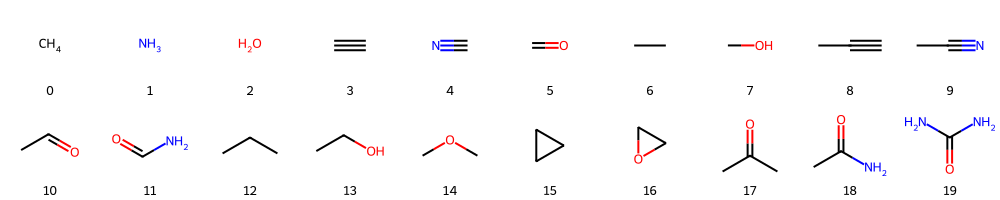

In [9]:
# get a list of molecules stored in moldata
molecules = moldata.get_mols()
# get images of molecules
MolData.draw_molecules(molecules, max_draw=20)

## Feature Encoding

In [10]:
with parallel_backend('threading', n_jobs=12):
    fs_atom = moldata.extract_features(HeavyAtomExtractor(moldata))
    fs_ring = moldata.extract_features(RingExtractor(moldata))
    fs_aring = moldata.extract_features(AromaticRingExtractor(moldata))
    fs_fp_structure1 = moldata.extract_features(FingerPrintStructureExtractor(moldata, radius=1))
    fs_atom_sum = moldata.extract_features(FeatureSumOperator(moldata, fs_atom))

In [11]:
features = [fs_atom, fs_ring, fs_aring, fs_fp_structure1, fs_atom_sum]

In [11]:
# with open("features.pickle", "wb") as f:
#     pickle.dump(features, f)

with open("qm9_features.pickle", "wb") as f:
    pickle.dump(features, f)

In [12]:
with open("qm9_features.pickle", "rb") as f:
    features = pickle.load(f)

In [12]:
with parallel_backend('threading', n_jobs=12):
    features_fp = moldata.merge_features(map(lambda f: f.id, features))

In [4]:
moldata = joblib.load("moldata_features.joblib")

In [15]:
features_fp = moldata.merged_features_list[0]

In [16]:
features_fp.print_features()

|aromatic_ring|finger_print_structure:radius=1|heavy_atom|heavy_atom:sum()|ring|:['aring:5', 'aring:6', 'aring:7', 'aring:9', 'fp:r1[C]:*#C', 'fp:r1[C]:*#N', 'fp:r1[C]:*=O', 'fp:r1[C]:*C', 'fp:r1[C]:*N', 'fp:r1[C]:*O', 'fp:r1[C]:*[CH2-]', 'fp:r1[C]:*[NH3+]', 'fp:r1[C]:C#*C', 'fp:r1[C]:C#*[CH2-]', 'fp:r1[C]:C*#N', 'fp:r1[C]:C*(=N)N', 'fp:r1[C]:C*(=N)O', 'fp:r1[C]:C*(=N)[NH-]', 'fp:r1[C]:C*(=O)O', 'fp:r1[C]:C*(=O)[O-]', 'fp:r1[C]:C*(C)(C)C', 'fp:r1[C]:C*(C)(C)N', 'fp:r1[C]:C*(C)(C)O', 'fp:r1[C]:C*(C)(C)[NH-]', 'fp:r1[C]:C*(C)(C)[NH3+]', 'fp:r1[C]:C*(C)(O)O', 'fp:r1[C]:C*(C)=N', 'fp:r1[C]:C*(C)=O', 'fp:r1[C]:C*(C)C', 'fp:r1[C]:C*(C)N', 'fp:r1[C]:C*(C)O', 'fp:r1[C]:C*(C)[NH-]', 'fp:r1[C]:C*(C)[NH3+]', 'fp:r1[C]:C*(F)(F)F', 'fp:r1[C]:C*(N)=O', 'fp:r1[C]:C*(N)=[NH2+]', 'fp:r1[C]:C*(O)O', 'fp:r1[C]:C*([NH-])=O', 'fp:r1[C]:C*=O', 'fp:r1[C]:C*C', 'fp:r1[C]:C*N', 'fp:r1[C]:C*O', 'fp:r1[C]:C*[NH-]', 'fp:r1[C]:C*[NH3+]', 'fp:r1[C]:C=*(C)C', 'fp:r1[C]:C=*(C)N', 'fp:r1[C]:C=*(C)[NH3+]', 'fp:r1[C]:C=

In [17]:
moldata.get_dataframe(features=features_fp)

,aring:5,aring:6,aring:7,aring:9,fp:r1[C]:*#C,fp:r1[C]:*#N,fp:r1[C]:*=O,fp:r1[C]:*C,fp:r1[C]:*N,fp:r1[C]:*O,...,atom:O,atom:O-,atom:sum,ring:3,ring:4,ring:5,ring:6,ring:7,ring:8,ring:9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,0,0,0,0,2,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133880,0,0,0,0,0,0,0,0,0,0,...,1,0,9,1,3,4,0,0,0,0
133881,0,0,0,0,0,0,0,0,0,0,...,1,0,9,1,3,4,0,0,0,0
133882,0,0,0,0,0,0,0,0,0,0,...,0,0,9,1,3,4,0,0,0,0
133883,0,0,0,0,0,0,0,0,0,0,...,0,0,9,1,3,4,0,0,0,0


In [16]:
joblib.dump(moldata, 'moldata_features.joblib')

['moldata_features.joblib']

In [16]:
input_size = len(moldata.get_dataframe(features=features_fp).columns)

# Training

In [17]:
rf_lumo_model = moldata.optimize_and_select_features(RandomForestRegressionModel(moldata, 'lumo', features_fp))
with open("rf_lumo_model.pickle", "wb") as f:
    pickle.dump(rf_lumo_model, f)

rf_gap_model = moldata.optimize_and_select_features(RandomForestRegressionModel(moldata, 'gap', features_fp))
with open("rf_gap_model.pickle", "wb") as f:
    pickle.dump(rf_gap_model, f)

rf_homo_model = moldata.optimize_and_select_features(RandomForestRegressionModel(moldata, 'homo', features_fp))
with open("rf_homo_model.pickle", "wb") as f:
    pickle.dump(rf_homo_model, f)

regression model parameter optimization target='lumo': data_size=133885: model:RandomForestRegressor n_splits=3 shuffle=True
optimized parameters: {'min_samples_split': 3}
regression model cross validation target='lumo': data_size=133885: model:RandomForestRegressor n_splits=3 shuffle=True
R^2 score=0.98 cv_score=0.94 (+/- 0.00)
feature selection target='lumo': data_size=133885: model:RandomForestRegressor:min_samples_split=3:opt threshold=None
feature size:278 -> 277
regression model cross validation target='lumo': data_size=133885: model:RandomForestRegressor n_splits=3 shuffle=True
R^2 score=0.98 cv_score=0.94 (+/- 0.00)
regression model parameter optimization target='gap': data_size=133885: model:RandomForestRegressor n_splits=3 shuffle=True
optimized parameters: {'min_samples_split': 3}
regression model cross validation target='gap': data_size=133885: model:RandomForestRegressor n_splits=3 shuffle=True
R^2 score=0.97 cv_score=0.92 (+/- 0.00)
feature selection target='gap': data_si

In [17]:
with parallel_backend('threading', n_jobs=12):
    lasso_lumo_model = moldata.optimize_and_select_features(LassoRegressionModel(moldata, 'lumo', features_fp))
    joblib.dump(lasso_lumo_model, 'lasso_lumo_model.joblib')

    lasso_gap_model = moldata.optimize_and_select_features(LassoRegressionModel(moldata, 'gap', features_fp))
    joblib.dump(lasso_gap_model, 'lasso_gap_model.joblib')

    lasso_homo_model = moldata.optimize_and_select_features(LassoRegressionModel(moldata, 'homo', features_fp))
    joblib.dump(lasso_homo_model, 'lasso_homo_model.joblib')

regression model parameter optimization target='lumo': data_size=133885: model:Lasso n_splits=3 shuffle=True


KeyboardInterrupt: 

In [18]:
en_lumo_model = moldata.optimize_and_select_features(ElasticNetRegressionModel(moldata, 'lumo', features_fp))
with open("en_lumo_model.pickle", "wb") as f:
    pickle.dump(en_lumo_model, f)

en_gap_model = moldata.optimize_and_select_features(ElasticNetRegressionModel(moldata, 'gap', features_fp))
with open("en_gap_model.pickle", "wb") as f:
    pickle.dump(en_gap_model, f)

en_homo_model = moldata.optimize_and_select_features(ElasticNetRegressionModel(moldata, 'homo', features_fp))
with open("en_homo_model.pickle", "wb") as f:
    pickle.dump(en_homo_model, f)

regression model parameter optimization target='lumo': data_size=133885: model:ElasticNet n_splits=3 shuffle=True


KeyboardInterrupt: 

In [ ]:
with open("rf_lumo_model.pickle", "rb") as f:
    rf_lumo_model = pickle.load(f)

with open("rf_gap_model.pickle", "rb") as f:
    rf_gap_model = pickle.load(f)

with open("rf_homo_model.pickle", "rb") as f:
    rf_homo_model = pickle.load(f)

with open("lasso_lumo_model.pickle", "rb") as f:
    lasso_lumo_model = pickle.load(f)

with open("lasso_gap_model.pickle", "rb") as f:
    lasso_gap_model = pickle.load(f)

with open("lasso_homo_model.pickle", "rb") as f:
    lasso_homo_model = pickle.load(f)

with open("en_lumo_model.pickle", "rb") as f:
    en_lumo_model = pickle.load(f)

with open("en_gap_model.pickle", "rb") as f:
    en_gap_model = pickle.load(f)

with open("en_homo_model.pickle", "rb") as f:
    en_homo_model = pickle.load(f)


moldata.add_regression_model(rf_lumo_model)
moldata.add_regression_model(rf_gap_model)
moldata.add_regression_model(rf_homo_model)

moldata.add_regression_model(lasso_lumo_model)
moldata.add_regression_model(lasso_gap_model)
moldata.add_regression_model(lasso_homo_model)

moldata.add_regression_model(en_lumo_model)
moldata.add_regression_model(en_gap_model)
moldata.add_regression_model(en_homo_model)

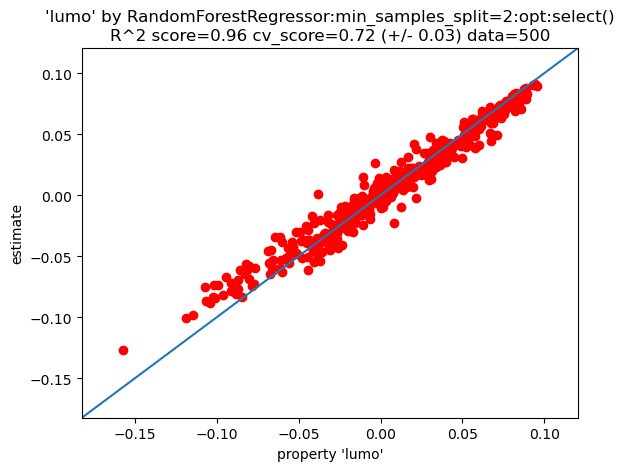

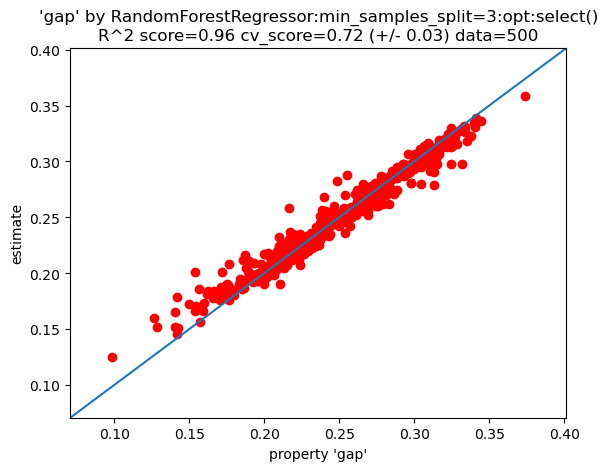

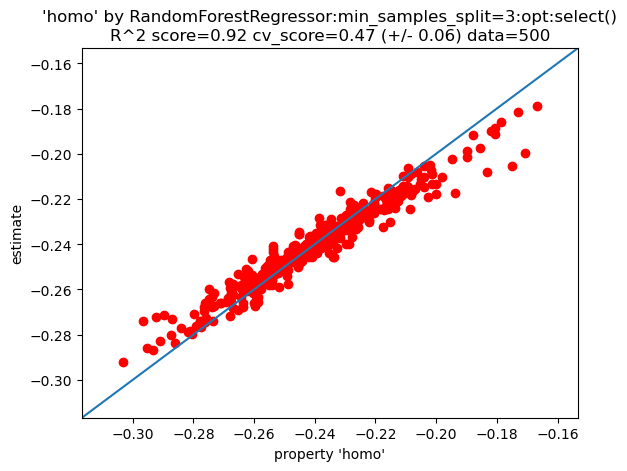

In [35]:
rf_lumo_model.plot_estimate()
rf_gap_model.plot_estimate()
rf_homo_model.plot_estimate()

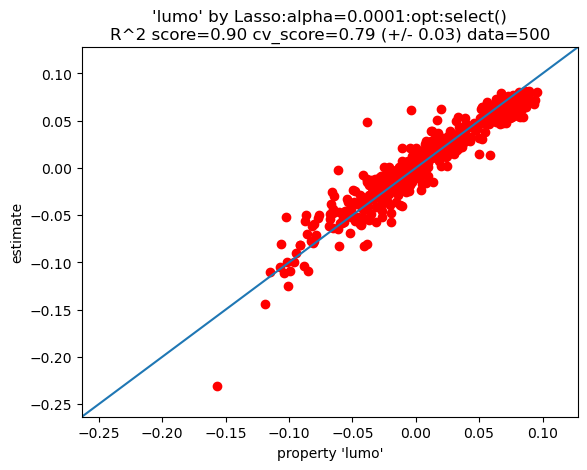

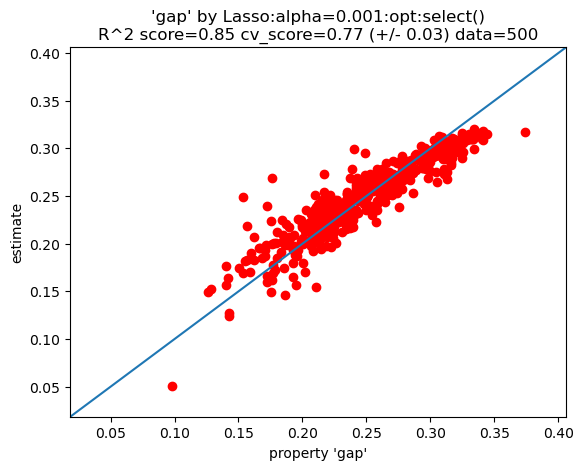

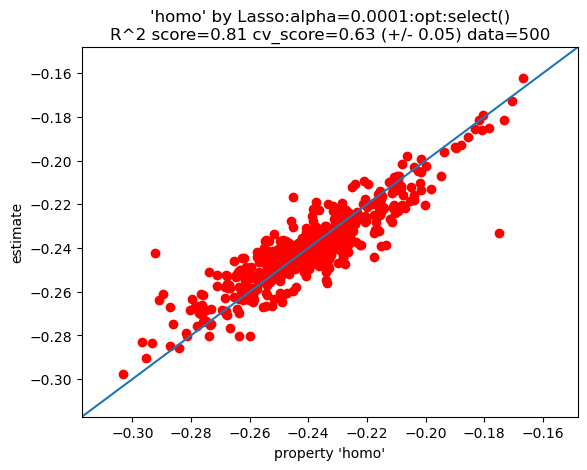

In [40]:
lasso_lumo_model.plot_estimate()
lasso_gap_model.plot_estimate()
lasso_homo_model.plot_estimate()

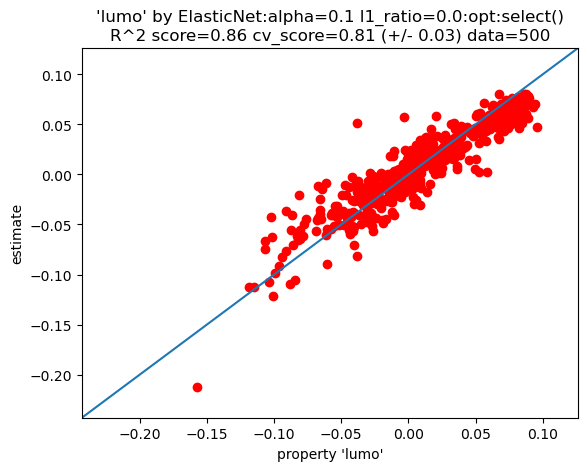

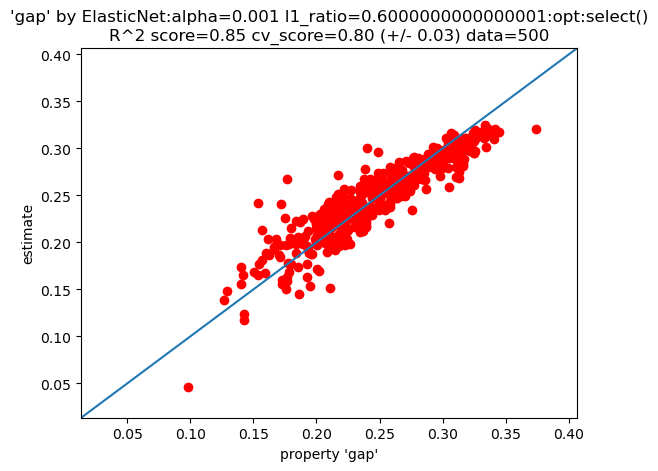

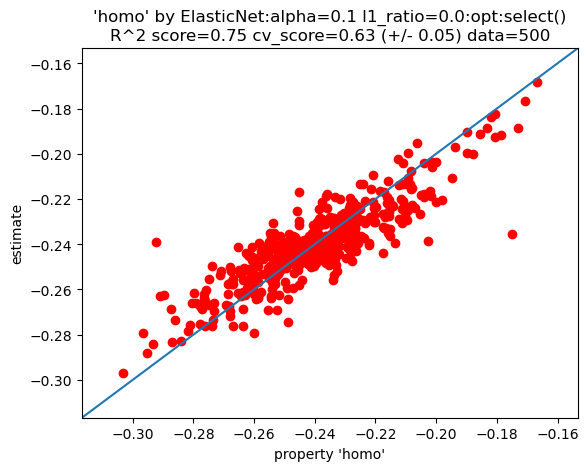

In [41]:
en_lumo_model.plot_estimate()
en_gap_model.plot_estimate()
en_homo_model.plot_estimate()

In [42]:
moldata.print_regression_models()

regression model list:''
 * target property: 'gap'
  + features: |aromatic_ring|finger_print_structure:radius=1|heavy_atom|heavy_atom:sum()|ring|
   0: R^2 score=0.96 cv_score=0.72 (+/- 0.03) size=121/122 RandomForestRegressor:min_samples_split=3:opt:select()
   1: R^2 score=0.85 cv_score=0.77 (+/- 0.03) size=57/122 Lasso:alpha=0.001:opt:select()
   2: R^2 score=0.85 cv_score=0.80 (+/- 0.03) size=34/122 ElasticNet:alpha=0.001 l1_ratio=0.6000000000000001:opt:select()
 * target property: 'homo'
  + features: |aromatic_ring|finger_print_structure:radius=1|heavy_atom|heavy_atom:sum()|ring|
   0: R^2 score=0.92 cv_score=0.47 (+/- 0.06) size=121/122 RandomForestRegressor:min_samples_split=3:opt:select()
   1: R^2 score=0.81 cv_score=0.63 (+/- 0.05) size=90/122 Lasso:alpha=0.0001:opt:select()
   2: R^2 score=0.75 cv_score=0.63 (+/- 0.05) size=48/122 ElasticNet:alpha=0.1 l1_ratio=0.0:opt:select()
 * target property: 'lumo'
  + features: |aromatic_ring|finger_print_structure:radius=1|heavy_atom

In [46]:
legends = {
    fs_atom.id: 'atom',
    fs_ring.id: 'ring',
    fs_aring.id: 'aring',
    fs_fp_structure1.id: 'fp1'
}

In [47]:
df_model_lumo = moldata.get_regression_model_summary('lumo', legends=legends)
df_model_lumo

,model,model_id,score,cv_score,cv_score(std),rmse,size,aring (3),fp1 (109),atom (4),heavy_atom:sum() (1),ring (5)
0,<molgx.Prediction.ElasticNetRegressionModel ob...,ElasticNet:alpha=0.1 l1_ratio=0.0:opt:select(),0.857307,0.807966,0.028661,0.018126,42,3,34,3,1,1
1,<molgx.Prediction.LassoRegressionModel object ...,Lasso:alpha=0.0001:opt:select(),0.900531,0.790023,0.031626,0.015134,93,2,84,1,1,5
2,<molgx.Prediction.RandomForestRegressionModel ...,RandomForestRegressor:min_samples_split=2:opt:...,0.962783,0.722968,0.032779,0.009257,122,3,109,4,1,5


In [48]:
df_model_egap = moldata.get_regression_model_summary('gap', legends=legends)
df_model_egap

,model,model_id,score,cv_score,cv_score(std),rmse,size,aring (3),fp1 (109),atom (4),heavy_atom:sum() (1),ring (5)
0,<molgx.Prediction.ElasticNetRegressionModel ob...,ElasticNet:alpha=0.001 l1_ratio=0.600000000000...,0.847579,0.797706,0.029163,0.018776,34,3,29,0,1,1
1,<molgx.Prediction.LassoRegressionModel object ...,Lasso:alpha=0.001:opt:select(),0.845539,0.771974,0.032984,0.018902,57,3,48,1,1,4
2,<molgx.Prediction.RandomForestRegressionModel ...,RandomForestRegressor:min_samples_split=3:opt:...,0.959498,0.723250,0.029745,0.009679,121,3,108,4,1,5


In [49]:
df_model_homo = moldata.get_regression_model_summary('homo', legends=legends)
df_model_homo

,model,model_id,score,cv_score,cv_score(std),rmse,size,aring (3),fp1 (109),atom (4),heavy_atom:sum() (1),ring (5)
0,<molgx.Prediction.ElasticNetRegressionModel ob...,ElasticNet:alpha=0.1 l1_ratio=0.0:opt:select(),0.752237,0.631428,0.047943,0.010575,48,2,41,2,0,3
1,<molgx.Prediction.LassoRegressionModel object ...,Lasso:alpha=0.0001:opt:select(),0.806467,0.627294,0.054489,0.009346,90,3,81,2,0,4
2,<molgx.Prediction.RandomForestRegressionModel ...,RandomForestRegressor:min_samples_split=3:opt:...,0.923382,0.473653,0.057248,0.005881,121,3,108,4,1,5


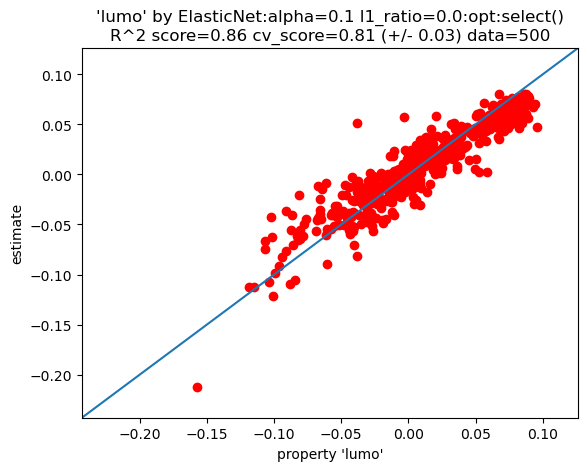

In [ ]:
best_model_lumo = df_model_lumo['model'][0]
best_model_lumo.plot_estimate()

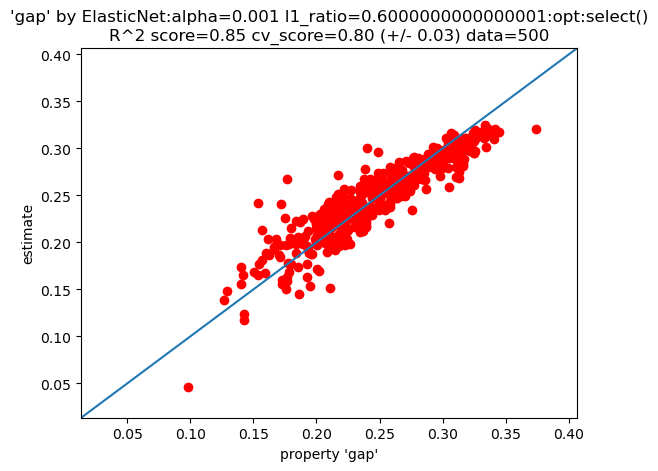

In [ ]:
best_model_egap = df_model_egap['model'][0]
best_model_egap.plot_estimate()

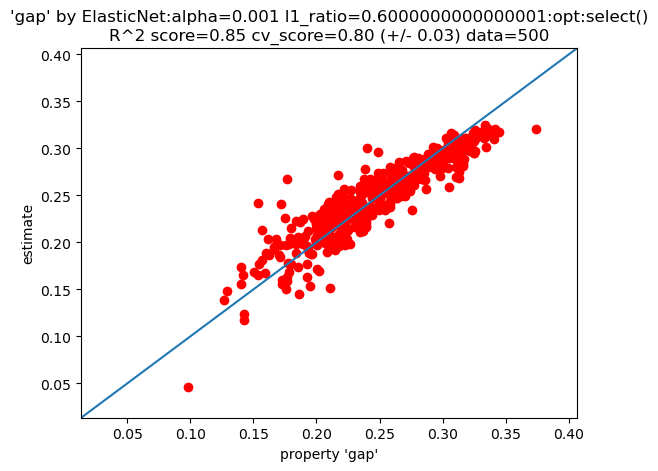

In [ ]:
best_model_homo = df_model_egap['model'][0]
best_model_homo.plot_estimate()

# Feature Estimation

In [20]:
design_param_1 = moldata.make_design_parameter({'lumo': 0.0, 'gap': 0.175}, prediction_error=0.1)
design_param_2 = moldata.make_design_parameter({'lumo': 0.0, 'gap': 0.20}, prediction_error=0.1)
design_param_3 = moldata.make_design_parameter({'lumo': 0.0, 'gap': 0.25}, prediction_error=0.1)
design_param_4 = moldata.make_design_parameter({'homo': -0.175, 'gap': 0.175}, prediction_error=0.1)
moldata.estimate_feature([best_model_lumo, best_model_egap], design_param_1, num_candidate=2)
moldata.estimate_feature([best_model_lumo, best_model_egap], design_param_2, num_candidate=2)
moldata.estimate_feature([best_model_lumo, best_model_egap], design_param_3, num_candidate=2)
moldata.estimate_feature([best_model_homo, best_model_egap], design_param_4, num_candidate=2)

ERROR:molgx.DataBox:duplicated target property in models


In [42]:
design_param_5 = moldata.make_design_parameter({'lumo': 0.0, 'gap': 0.31}, prediction_error=0.1)
moldata.estimate_feature([best_model_lumo, best_model_egap], design_param_5, num_candidate=2)

In [21]:
moldata.print_feature_estimates()

feature estimate list:''
 * target property: 'gap','lumo'
  + |aromatic_ring|finger_print_structure:radius=1|heavy_atom|heavy_atom:sum()|ring|
    |aromatic_ring|finger_print_structure:radius=1|heavy_atom|heavy_atom:sum()|ring|
   0: ElasticNet:alpha=0.1 l1_ratio=0.0:opt:select()
      Ridge:alpha=10.0:opt:select()
    - target value=((0.0, 0.0), (0.175, 0.175)) params=(0, 0, False, 2.0, 0, None, None, 0.1)
     0: 20241219182001982V0 vector(56) score=0.292
     1: 20241219182001982V1 vector(56) score=0.526
    - target value=((0.0, 0.0), (0.2, 0.2)) params=(0, 0, False, 2.0, 0, None, None, 0.1)
     0: 20241219182036714V0 vector(56) score=0.089
     1: 20241219182036714V1 vector(56) score=0.092
    - target value=((0.0, 0.0), (0.25, 0.25)) params=(0, 0, False, 2.0, 0, None, None, 0.1)
     0: 20241219182046974V0 vector(56) score=0.289
     1: 20241219182046974V1 vector(56) score=0.223


In [ ]:
with open(f"moldata_qm9_12_01_2025.pickle",  "wb") as f:
    pickle.dump(moldata, f)

# Structure Generation

In [27]:
moldata.generate_molecule([best_model_lumo, best_model_egap], design_param_1, without_estimate=False, max_gen=2, max_solution=20, max_node=200000)

ERROR:molgx.DataBox:no more candidate feature estimates for design params: ((0.0, 0.0), (0.175, 0.175), 0, 0, False, 2.0, 0, None, None, 0.1)


In [28]:
moldata.generate_molecule([best_model_lumo, best_model_egap], design_param_2, without_estimate=False, max_gen=2, max_solution=20, max_node=200000)

1 solutions 10000 nodes depth=0 (depth_node=[1607, 206, 774, 2463, 3600, 1350]) C1CN2CC(C2)O1
1 solutions 20000 nodes depth=0 (depth_node=[3550, 510, 2372, 6113, 6105, 1350]) C1=CNCNC1


In [36]:
moldata.generate_molecule([best_model_lumo, best_model_egap], design_param_3, without_estimate=False, max_gen=2, max_solution=20, max_node=200000)

0 solutions 10000 nodes depth=0 (depth_node=[639, 71, 408, 1471, 2202, 2393, 2816]) C1CNC1
3 solutions 20000 nodes depth=0 (depth_node=[808, 150, 651, 2083, 3448, 5199, 6837, 824]) C1CN1
3 solutions 30000 nodes depth=0 (depth_node=[808, 152, 688, 2146, 3720, 6232, 10417, 5837]) C1CN1
3 solutions 40000 nodes depth=0 (depth_node=[809, 213, 727, 2230, 4056, 7453, 13854, 10658]) C1CN1


In [34]:
moldata.generate_molecule([best_model_homo, best_model_egap], design_param_4, without_estimate=False, max_gen=2, max_solution=20, max_node=200000)

ERROR:molgx.DataBox:duplicated target property in models


In [31]:
moldata.get_generated_molecule_summary([best_model_lumo, best_model_egap], design_param_1)

,ID,molecule,ROMol,SMILES,"lumo (0.0, 0.0)",lumo score,"gap (0.175, 0.175)",gap score
0,20241219182345540M0,<molgx.Molecule.GeneratedMolecule object at 0x...,<rdkit.Chem.rdchem.Mol object at 0x7505225efed0>,CON1CC2CC1NN2,-0.080812,20.691974,0.097086,15.954402


In [33]:
moldata.get_generated_molecule_summary([best_model_homo, best_model_egap], design_param_4)

ERROR:molgx.DataBox:no feature estimation result specified by the models


In [35]:
moldata.get_generated_molecule_summary([best_model_lumo, best_model_egap], design_param_2)

,ID,molecule,ROMol,SMILES,"lumo (0.0, 0.0)",lumo score,"gap (0.2, 0.2)",gap score
0,20241219182036714V1M0,<molgx.Molecule.GeneratedMolecule object at 0x...,<rdkit.Chem.rdchem.Mol object at 0x75051112e260>,CC1(F)C(=O)n2cncc21,-0.009325,0.275529,0.192027,0.167083


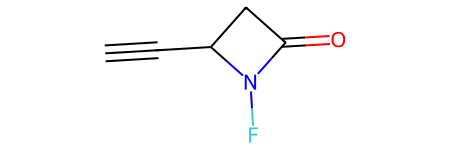

In [39]:
moldata.get_generated_molecule_summary([best_model_lumo, best_model_egap], design_param_3).iloc[0].ROMol

In [ ]:
moldata.generate_molecule([best_model_lumo, best_model_egap], design_param_5, without_estimate=False, max_gen=2, max_solution=20, max_node=200000)

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x750599647020>>
Traceback (most recent call last):
  File "/home/newbee/.conda/envs/molgx_env/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x750599647020>>
Traceback (most recent call last):
  File "/home/newbee/.conda/envs/molgx_env/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


0 solutions 10000 nodes depth=0 (depth_node=[1036, 1239, 2333, 3558, 1382, 452]) C1NC2C3OC1C23
1 solutions 20000 nodes depth=0 (depth_node=[2254, 2484, 5495, 7175, 2140, 452]) C1CC2(CO2)NCO1
